In [2]:
import pandas as pd
from matplotlib.pyplot import plot as plt

In [3]:
df_raw = pd.read_csv('./KaDo.csv')

In [4]:
df_raw.head()

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
0,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
1,35592159,10,1.66,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
2,35592159,10,7.45,SOINS DU VISAGE,VIS_CJOUR Jeunes Specifique,VIS_JEUNE_ET_LEVRE,CR JR PARF BIO.SPE AC.SENT.50ML,1490281
3,35592159,10,5.95,SOINS DU VISAGE,VIS_DEMAQ AAAR,VIS_AAAR_DEMAQLOTION,EAU MICELLAIRE 3 THES FL200ML,1490281
4,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 TIARE FL 200ML,1490281


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df = df_raw.copy()

In [7]:
df = df.filter(['MOIS_VENTE', 'TICKET_ID', 'CLI_ID'])

In [8]:
df.head()

,MOIS_VENTE,TICKET_ID,CLI_ID
0,10,35592159,1490281
1,10,35592159,1490281
2,10,35592159,1490281
3,10,35592159,1490281
4,10,35592159,1490281


In [9]:
cart_df = df.groupby(["MOIS_VENTE", "CLI_ID"], as_index=True).count()

In [19]:
cart_df.head()

TICKET_ID
MOIS_VENTE CLI_ID             
1          20163348          1
           20200041          2
           20727324          5
           21046542          4
           21239163          5

In [11]:
import matplotlib.pyplot as pplt

In [12]:
color_map = pplt.get_cmap('inferno') 
reversed_color_map = color_map.reversed()

In [21]:
cart_df_reset_index = cart_df.reset_index()
cart_df_reset_index.head()

,MOIS_VENTE,CLI_ID,TICKET_ID
count,211944.0,2.119440e+05,211944.000000
mean,1.0,9.780602e+08,3.345096
std,0.0,1.845400e+07,2.969069
min,1.0,2.016335e+07,1.000000
25%,1.0,9.714168e+08,1.000000
50%,1.0,9.804743e+08,3.000000
75%,1.0,9.902712e+08,4.000000
max,1.0,9.958153e+08,162.000000


In [14]:
color_map = pplt.get_cmap('inferno') 
reversed_color_map = color_map.reversed()

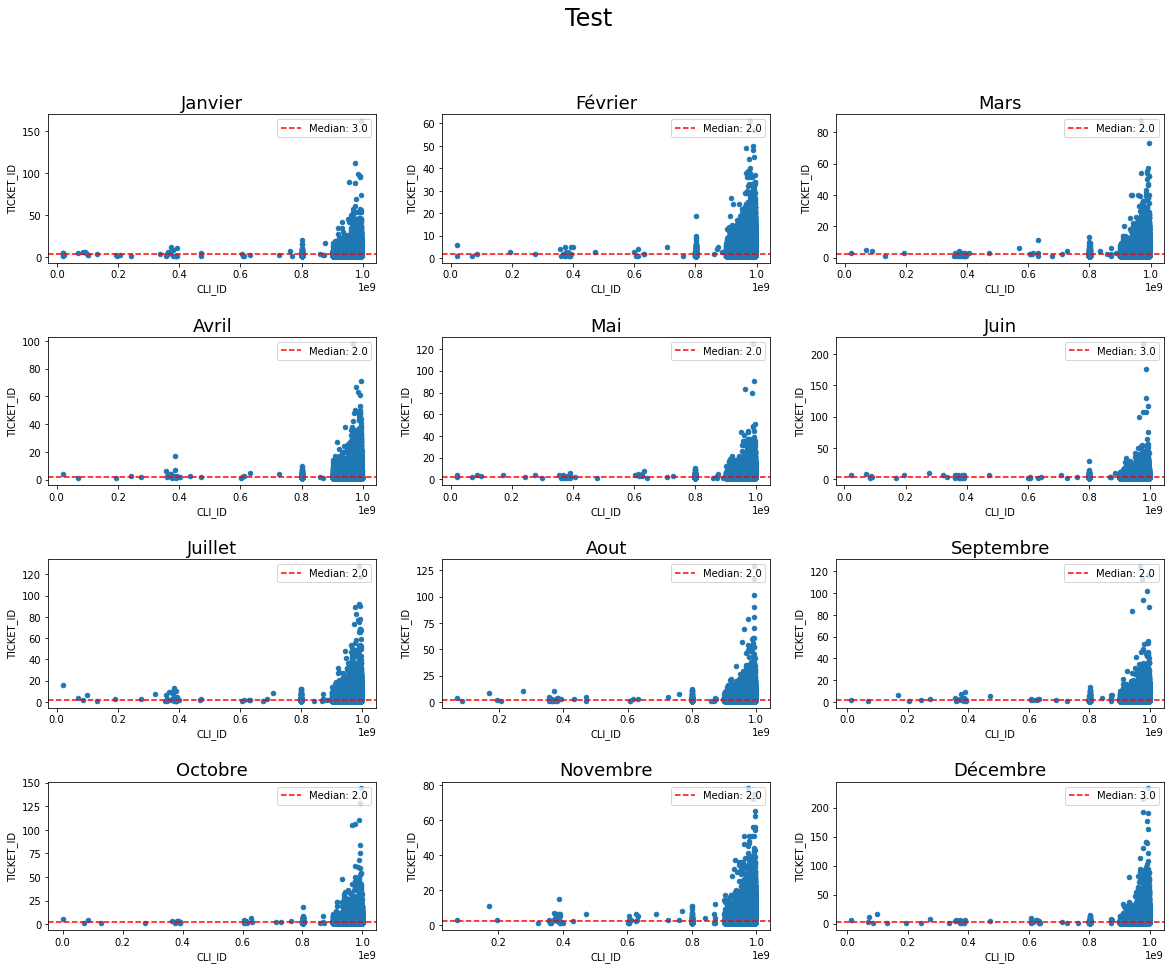

In [117]:

month = range(1, 13)
nrow=4
ncol=3
df_list = []
fig, axes = pplt.subplots(nrow, ncol, figsize=(20,15))
months = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Aout", "Septembre", "Octobre", "Novembre", "Décembre"]
count = 0

pplt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

fig.suptitle("Test", fontsize=24)
for m in month:
    df_list.append(cart_df_reset_index[cart_df_reset_index["MOIS_VENTE"] == m])
for i, ax in enumerate(axes.ravel()): # 2
    ax.set_title(months[i], fontsize=18) # 3
for r in range(nrow):
    for c in range(ncol):
        # df_list[count].plot.scatter(x="CLI_ID", y="TICKET_ID", ax=axes[r,c], c="TICKET_ID", colormap=reversed_color_map)
        df_list[count].plot.scatter(x="CLI_ID", y="TICKET_ID", ax=axes[r,c])
        axes[r][c].axhline(y=df_list[count]["TICKET_ID"].median(), c='red', linestyle='dashed', label=f'Median: {df_list[count]["TICKET_ID"].median()}')
        axes[r][c].legend(loc="upper left")
        count += 1

In [16]:
cart_df_reset_index["TICKET_ID"].describe()

count    2.303790e+06
mean     3.145044e+00
std      2.855368e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      2.330000e+02
Name: TICKET_ID, dtype: float64

Text(-1, 2.3, 'average')

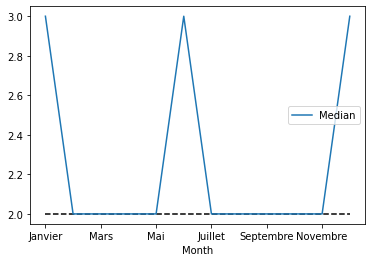

In [84]:
import numpy as np


months = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Aout", "Septembre", "Octobre", "Novembre", "Décembre"]
mean_array = np.empty(12)
for m in month:
    mean_array[m-1] = cart_df_reset_index[cart_df_reset_index["MOIS_VENTE"] == m].filter(["TICKET_ID"]).median()

axes = pd.DataFrame({
"Month": months,
"Median": mean_array

}).plot.line(x='Month', y='Median')


axes.hlines(np.median(mean_array), 0,11, linestyles='dashed')
axes.annotate('average',(-1,2.3))